# Droplet Spreading over a spherical surface
![Spherical_spreading domain configuration](SphericalSpreading.png)


In this study, we consider a droplet spreading over a spherical surface for a very small Bond number ($Bo\ll1$), as described in [patel2017coupled](https://doi.org/10.1016/j.ces.2017.03.012) . This case study allows studying the spreading of a droplet over a complex surface discretized using an unstructured Cartesian three-dimensional mesh refined locally around the spherical object.  Ideally, for a droplet that spreads with $Bo\ll1$, surface tension forces dominate, and the droplet at equilibrium maintains a spherical cap shape and satisfies the contact angle boundary condition.

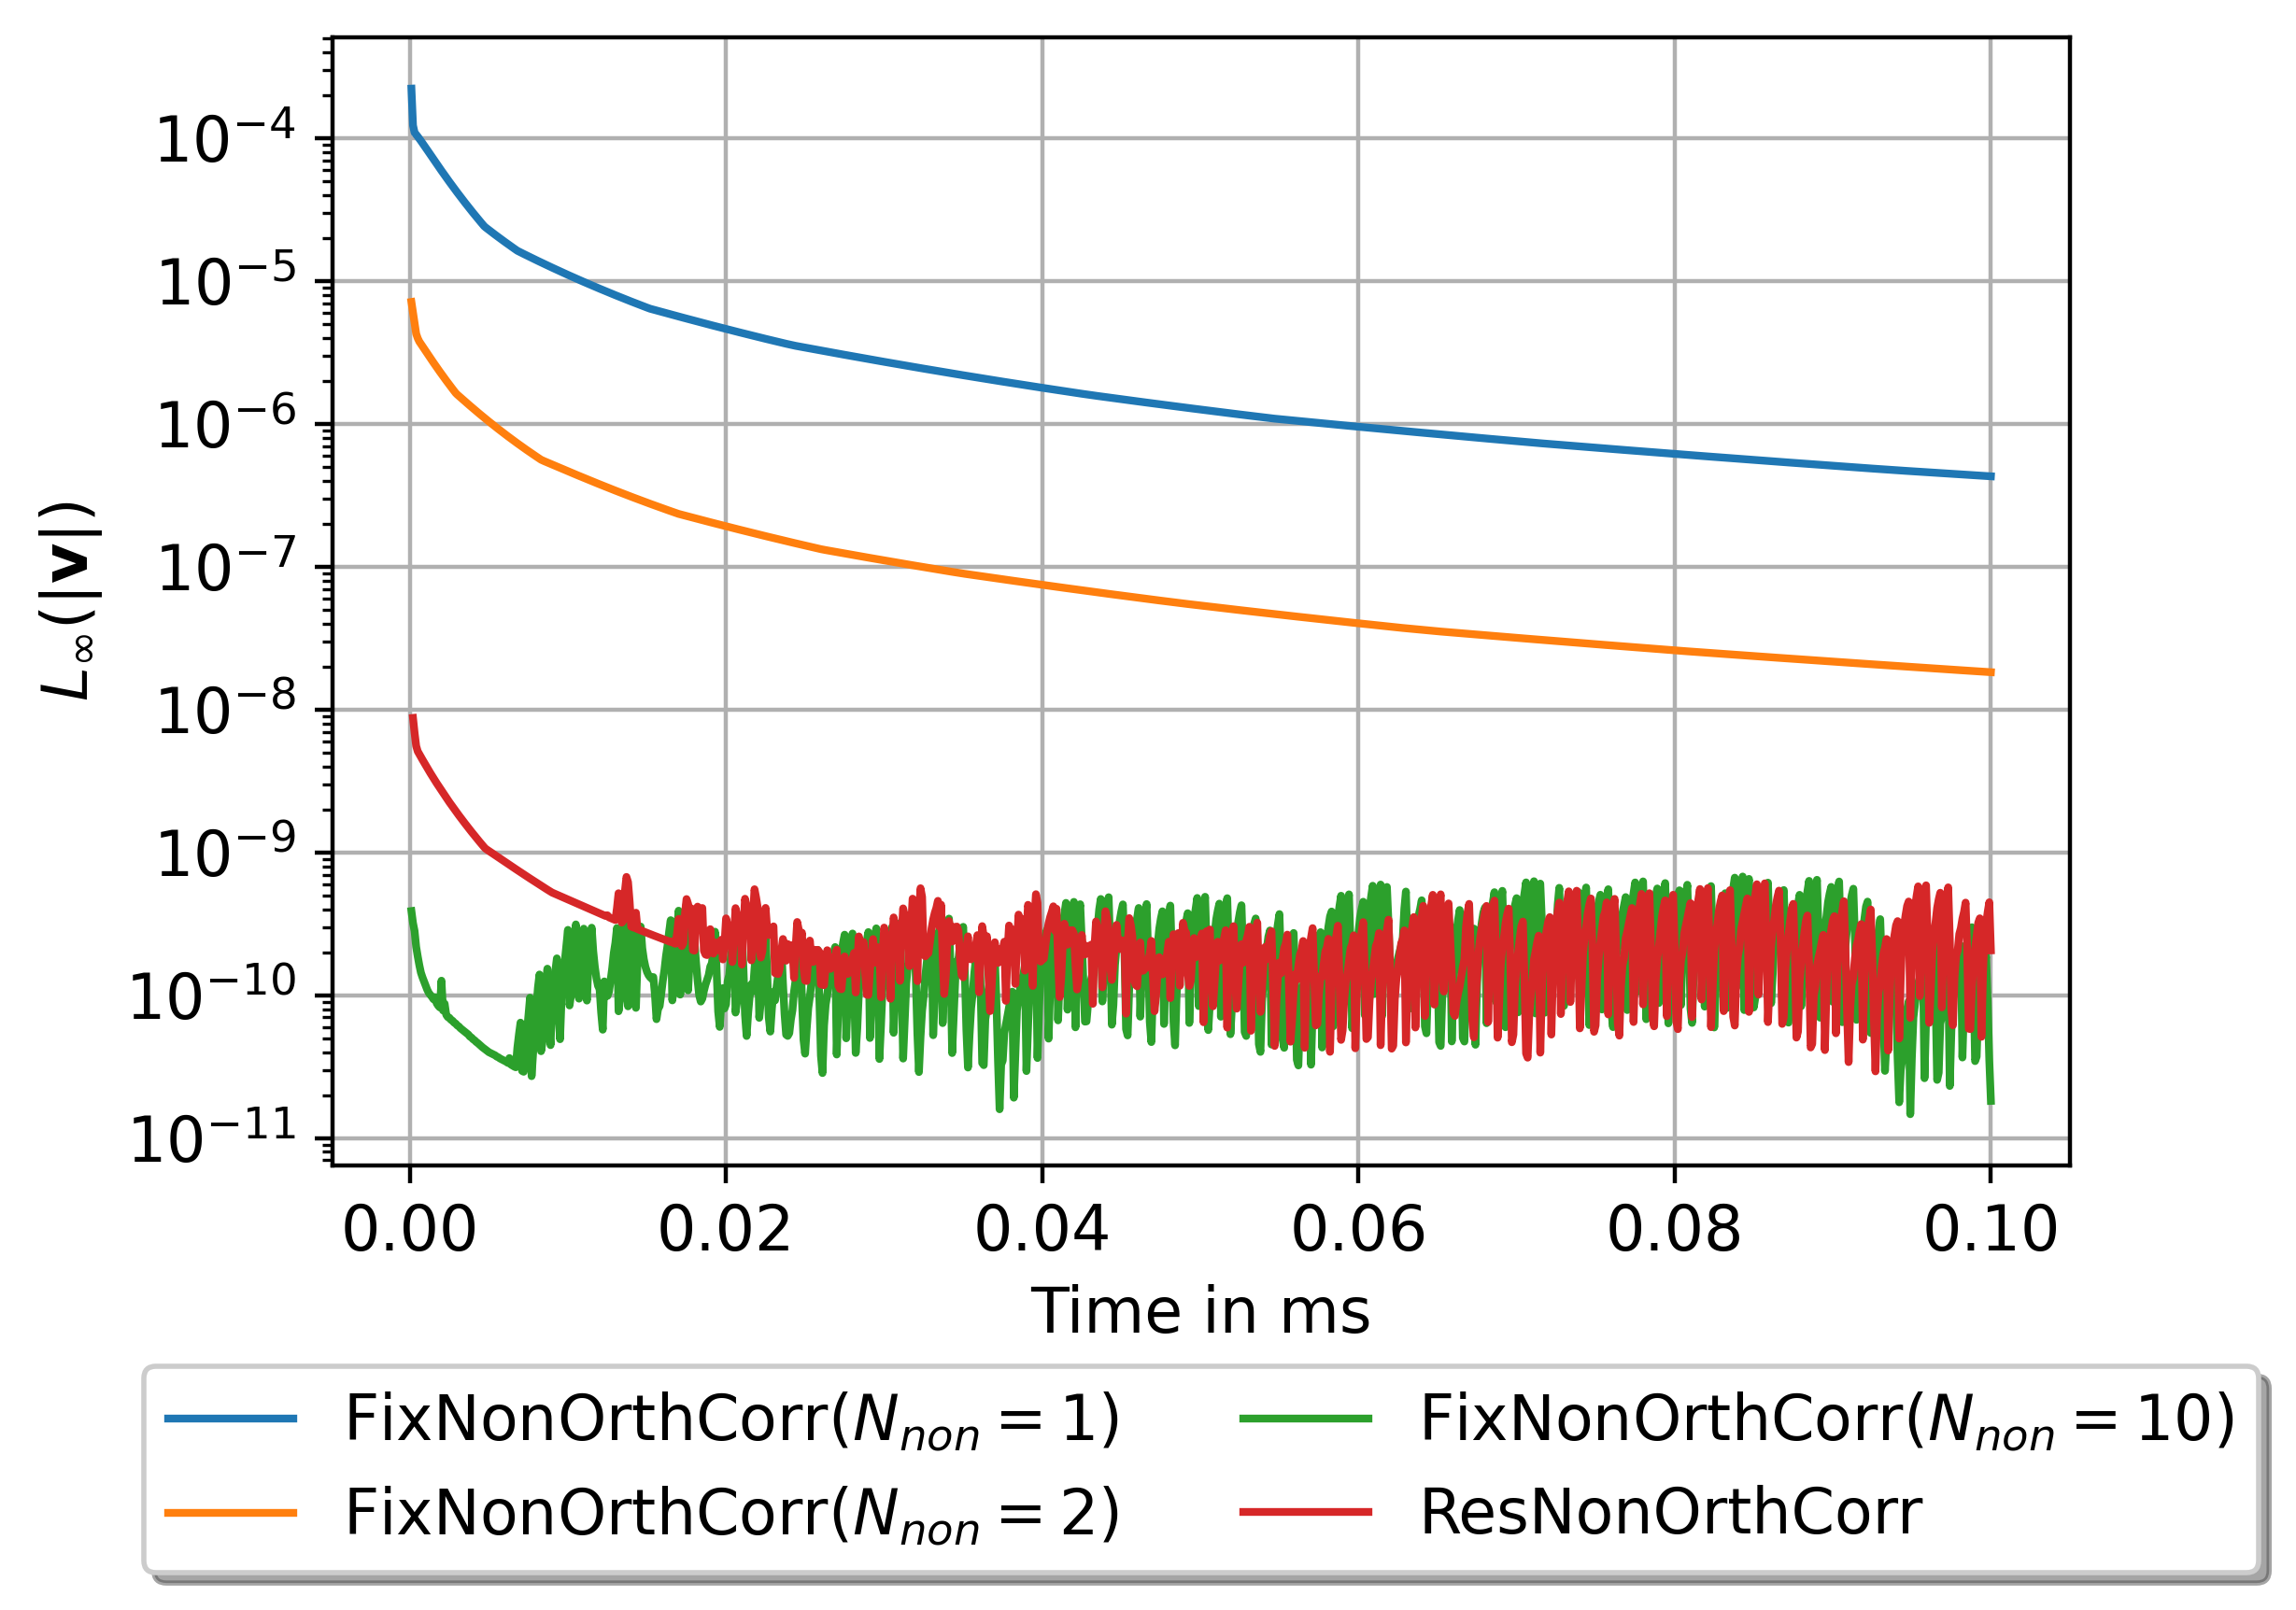

In [61]:
rcParams["figure.dpi"] = 400
df_PIMPLEN1 = pd.read_csv('pureTET/origPIMPLEN1/SumWettedSf_bo_bak.dat', sep="\t", header=0)
df_PIMPLEN2 = pd.read_csv('pureTET/origPIMPLEN2/SumWettedSf_bo_bak.dat', sep="\t", header=0)
df_PIMPLEN10 = pd.read_csv('pureTET/origPIMPLEN10/SumWettedSf_bo_bak.dat', sep="\t", header=0)
df_resCtrl = pd.read_csv('pureTET/resCtrlNonOrthogPIMPLE/SumWettedSf_bo_mpsd.dat', sep="\t", header=0)
#wettedArea1 = pd.read_csv('mpsd_staticState_ConstantCurv_ResidualControl/SumWettedSf_bo.dat', sep="\t", header=0)
plt.plot(df_PIMPLEN1["time"].iloc[1:]*1000, 
         df_PIMPLEN1["maxU"].iloc[1:],#marker='+',
         label=r"FixNonOrthCorr($N_{non}=1$)")
plt.plot(df_PIMPLEN2["time"].iloc[1:]*1000, 
         df_PIMPLEN2["maxU"].iloc[1:],#marker='+',
         label=r"FixNonOrthCorr($N_{non}=2$)")
plt.plot(df_PIMPLEN10["time"].iloc[1:]*1000, 
         df_PIMPLEN10["maxU"].iloc[1:],#marker='+',
         label=r"FixNonOrthCorr($N_{non}=10$)")
plt.plot(df_resCtrl["time"].iloc[2:]*1000, 
         df_resCtrl["maxU"].iloc[2:],#marker='^',
         label="ResNonOrthCorr")

#plt.plot(wettedArea["time"].iloc[10:]*1000, 
        #wettedArea["WettedArea_bottom"].iloc[10:]*1e6)
plt.xlabel("Time in ms")
plt.ylabel(r"$L_\infty (|\mathbf{v}|)$")
#plt.xscale("log")
#plt.xlim(left=0, right=0.65)
plt.yscale("log")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=2)
plt.grid()
plt.savefig("SphericalHat_LinfU.png", facecolor='w', dpi=400,bbox_inches='tight')
plt.show()

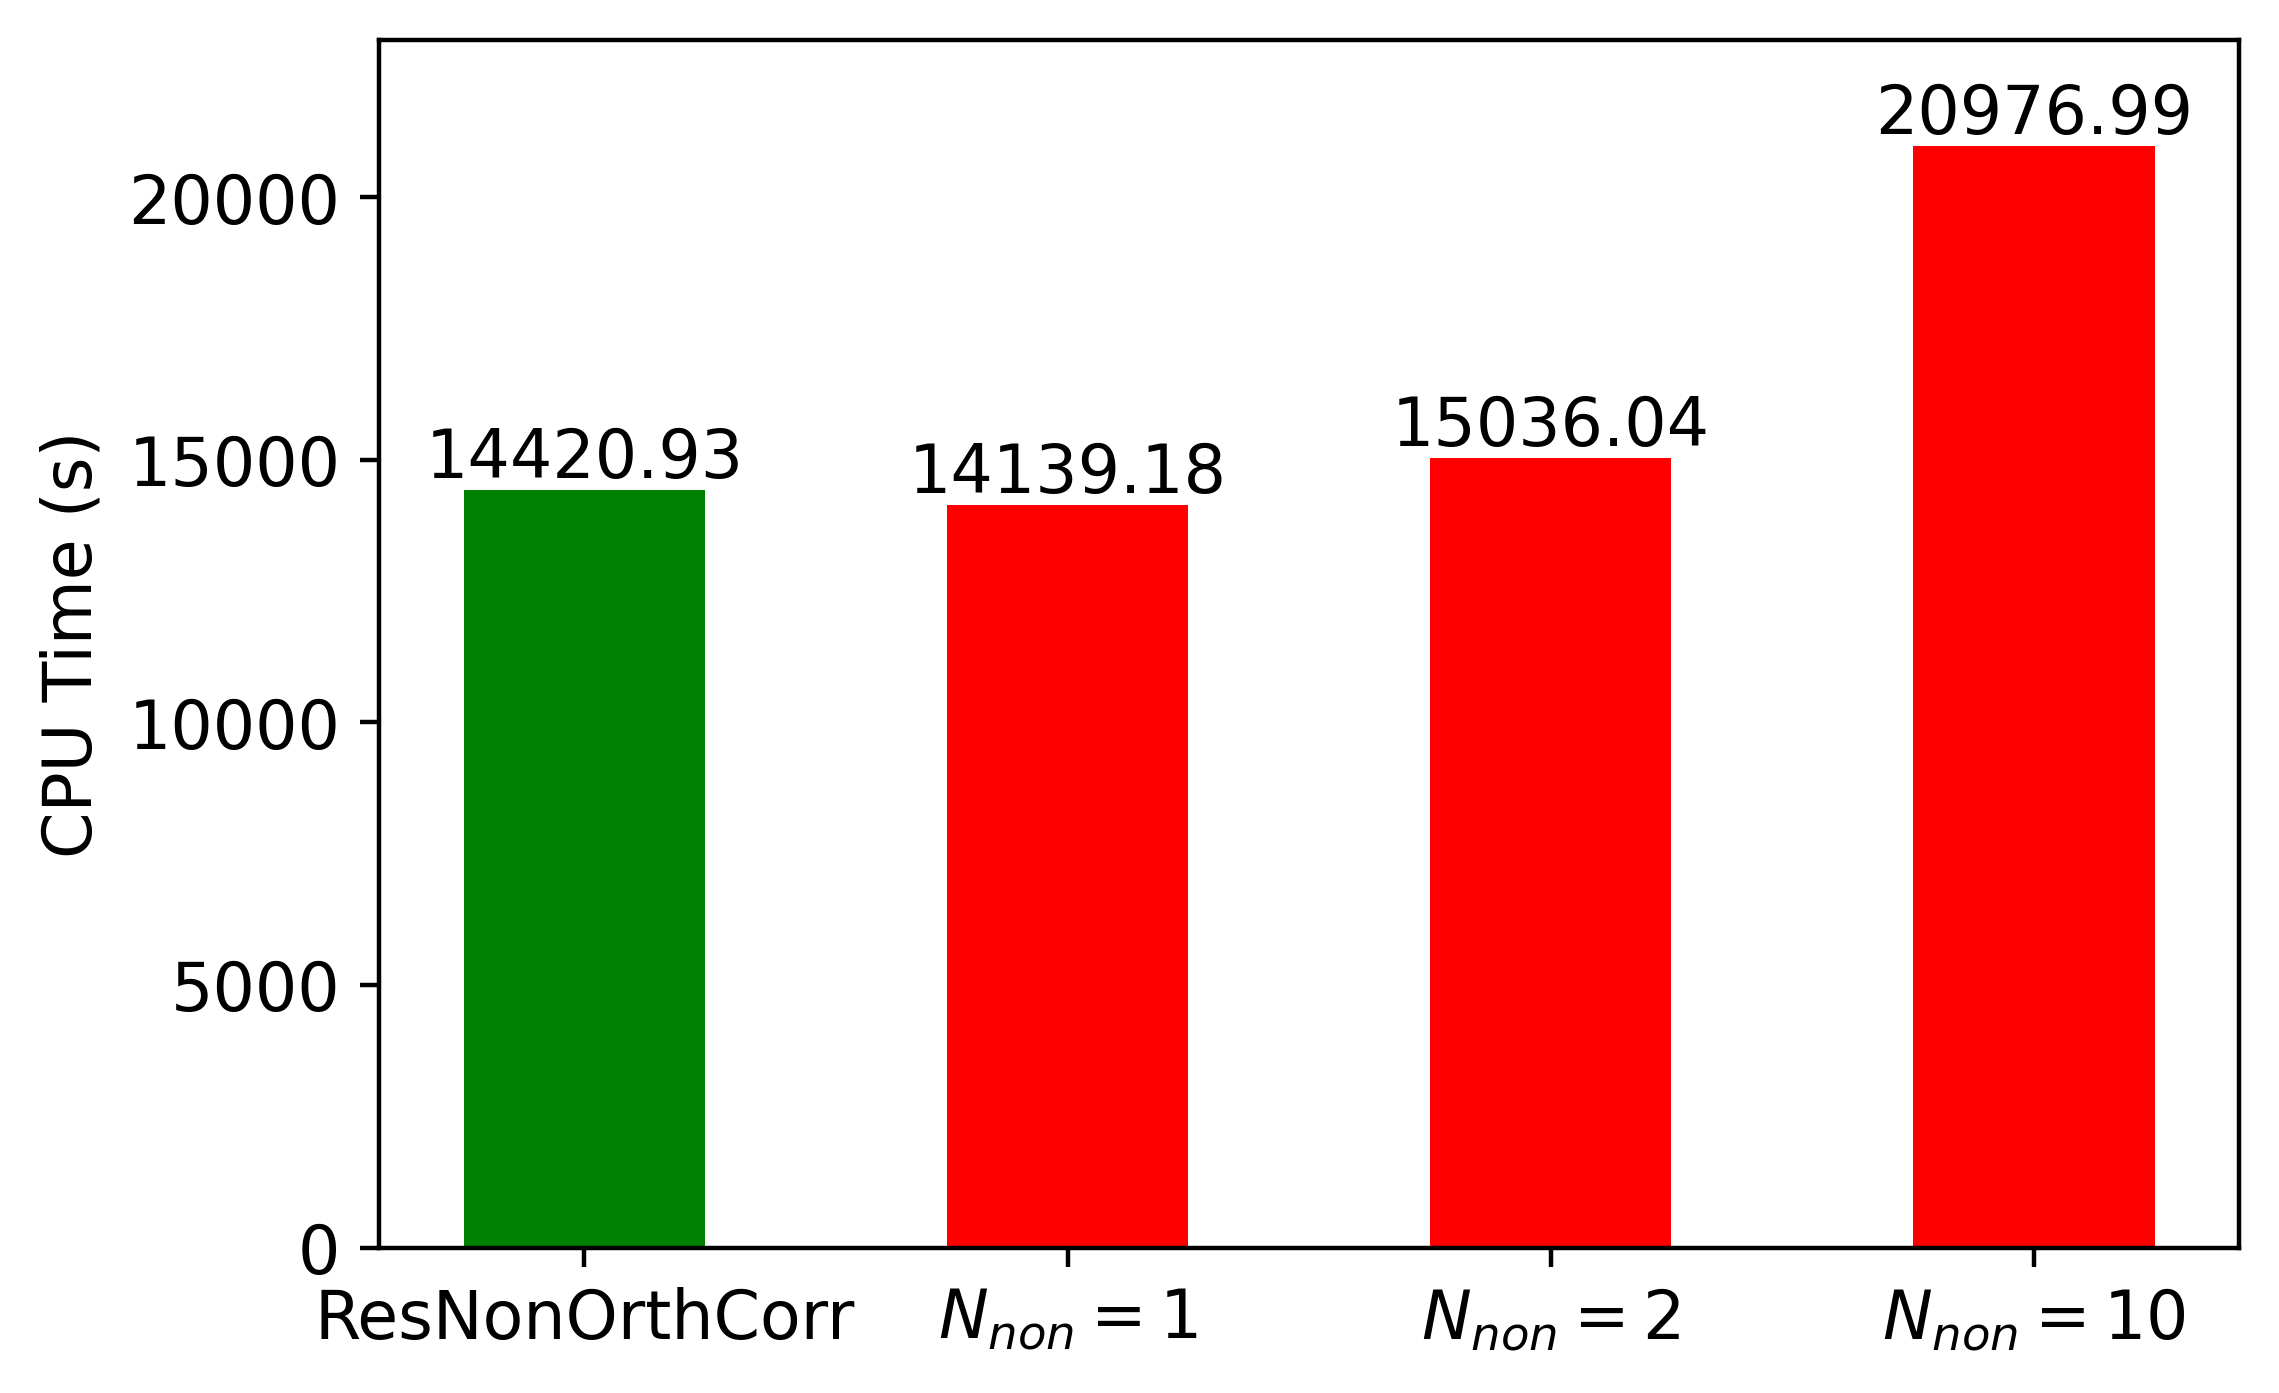

In [64]:

bin_edges = [0, 10, 20, 30] #[0, 10, 20, 30, 40]
bin_labels = [ "ResNonOrthCorr", r"$N_{non}=1$", r"$N_{non}=2$", r"$N_{non}=10$"] #['N30', 'N60', 'N90',r'$N_{non}=10$']

colors = ['green', 'red', 'red', 'red']

data = [14420.93, 14139.18, 15036.04, 20976.99]

# Plot the histogram
plt.bar(bin_labels, data, color=colors, width=0.5)

# Annotate each bar with its value
for i, value in enumerate(data):
    plt.text(i, value + 600, str(value), ha='center', va='center')

plt.ylabel("CPU Time (s)")
plt.ylim(0,23000)

plt.savefig("SphericalHat_CPUTime.png", facecolor='w', dpi=400,bbox_inches='tight')
plt.show()